## Connecting nodes with specific connections
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html#connecting-nodes-with-specific-connections


In [1]:
import nest
import matplotlib.pyplot as plt

[admin:1422944] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/3648126976/shared_mem_cuda_pool.admin could be created.
[admin:1422944] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")
noise_ex.set(rate=80000.0)
noise_in.set(rate=15000.0)

In [3]:
neuron = nest.Create("iaf_psc_alpha")


In [4]:
syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}
nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)

In [5]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [6]:
nest.Connect(multimeter, neuron)

In [7]:
nest.Simulate(1000.0)


Oct 02 12:46:52 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Oct 02 12:46:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 02 12:46:52 SimulationManager::run [Info]: 
    Simulation finished.


In [8]:
dmm = multimeter.get()

In [9]:
vm = dmm['events']['V_m']
times = dmm['events']['times']

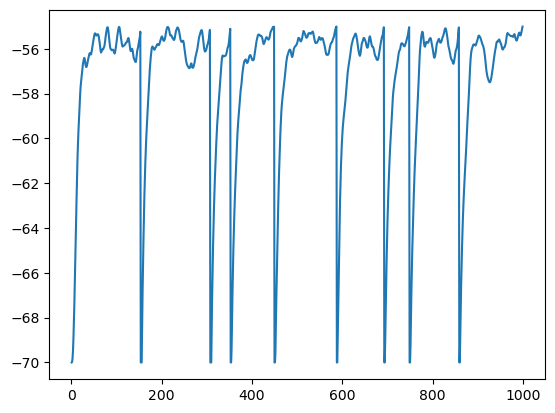

In [10]:
plt.plot(times, vm)